# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [32]:
# Load pickled data
import pickle
import numpy as np

# TODO: Fill this in based on where you saved the training and testing data

training_file = "train.p"
validation_file= "valid.p"
testing_file = "test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']
image_sizes = valid['sizes']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [33]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of validation examples
n_validation = X_valid.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = [X_train.shape[1], X_train.shape[2]]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(np.concatenate((y_train, y_valid, y_test), axis=0)))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

      

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = [32, 32]
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

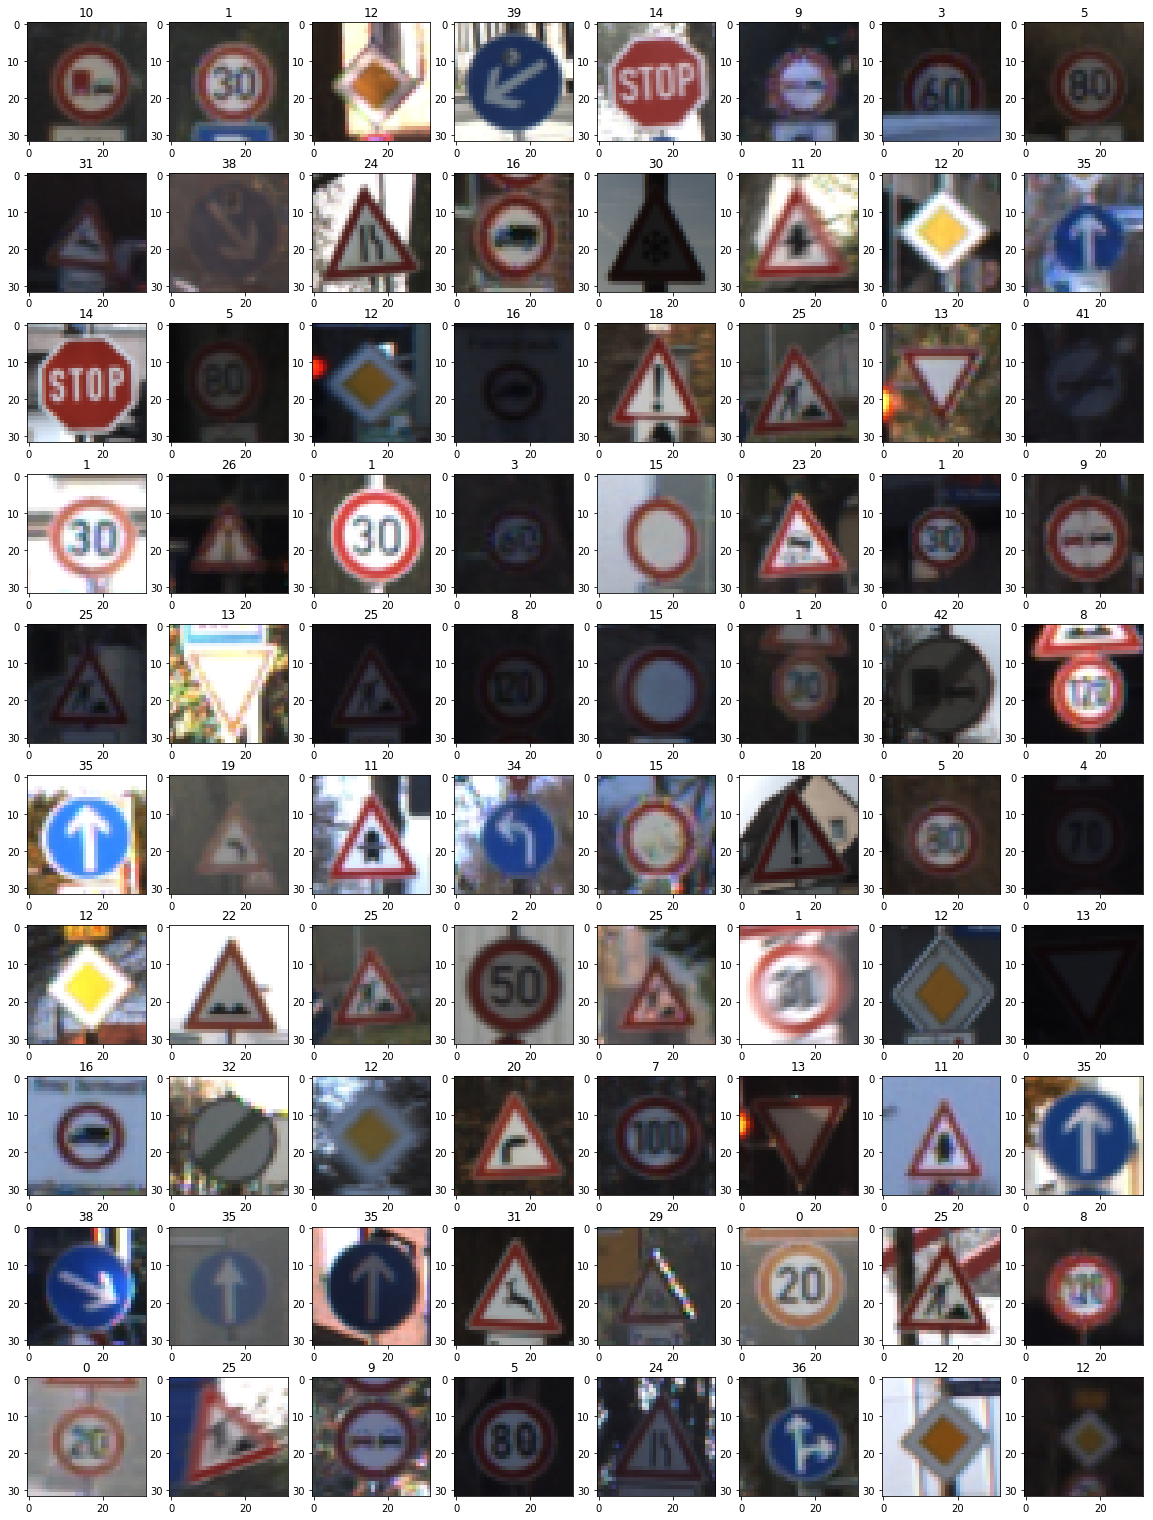

In [34]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline


images = []
category = []
for i in np.random.choice(n_train, 80, replace=False):
    images.append(X_train[i])
    category.append(y_train[i])
    
plt.figure(figsize=(20, 30))
columns = 8
for i, image in enumerate(images):
    sign  = plt.subplot(len(images) / columns + 1, columns, i + 1)
    sign.set_title(category[i])
    plt.imshow(image)
    


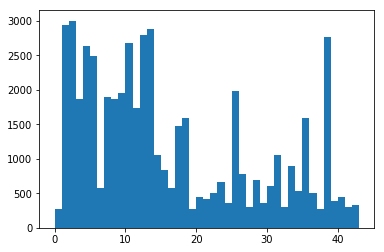

Least populated Sign 0
Most populated Sign 2
Standard Deviation Labels 918.20189051


In [35]:
n, bins, patches = plt.hist(np.concatenate((y_train, y_valid, y_test), axis=0), range(0,44))
plt.show()
print("Least populated Sign" , np.argmin(n))
print("Most populated Sign" , np.argmax(n))
print("Standard Deviation Labels" , np.std(n))

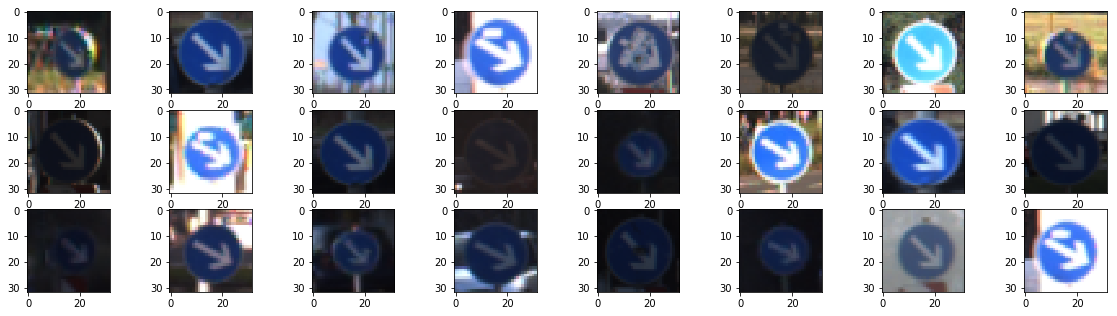

In [36]:
categoryimages = []
indices = np.where(y_train == 38)[0] #np.argmin(n))[0]
#[13, 17, 7, 27, 14 ,14 ,14, 23, 13, 21]
for i in np.random.choice(indices, 24, replace=False):
    categoryimages.append(X_train[i])


plt.figure(figsize=(20, 7))
columns = 8
for i, categoryimage in enumerate(categoryimages):
    plt.subplot(len(categoryimages) / columns + 1, columns, i + 1)
    plt.imshow(categoryimage)

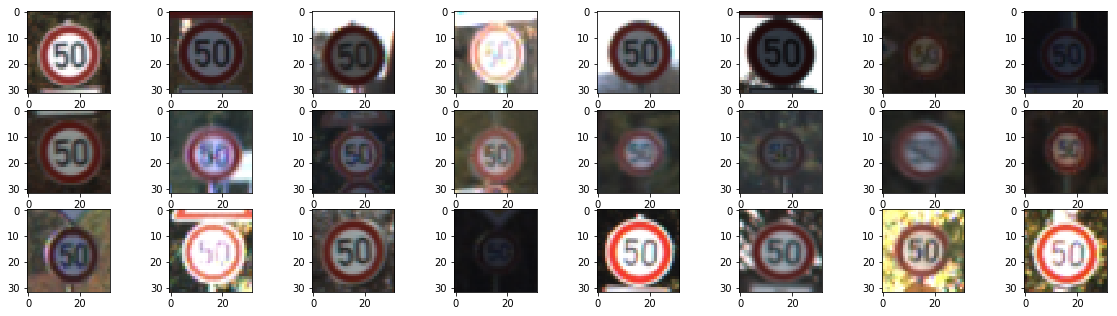

In [37]:
categoryimages = []
indices = np.where(y_train == np.argmax(n))[0]
for i in np.random.choice(indices, 24, replace=False):
    categoryimages.append(X_train[i])


plt.figure(figsize=(20, 7))
columns = 8
for i, categoryimage in enumerate(categoryimages):
    plt.subplot(len(categoryimages) / columns + 1, columns, i + 1)
    plt.imshow(categoryimage)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [38]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.
import cv2
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)


In [39]:
def normalize(image):
    """
    Normalize the image data with Min-Max scaling to a range of [0.1, 0.9]
    :param image_data: The image data to be normalized
    :return: Normalized image data
    """
    a = 0.01
    b = 0.99
    RGB_min = 0
    RGB_max = 255
    return a + ( ( (image - RGB_min)*(b - a) )/( RGB_max - RGB_min ) )


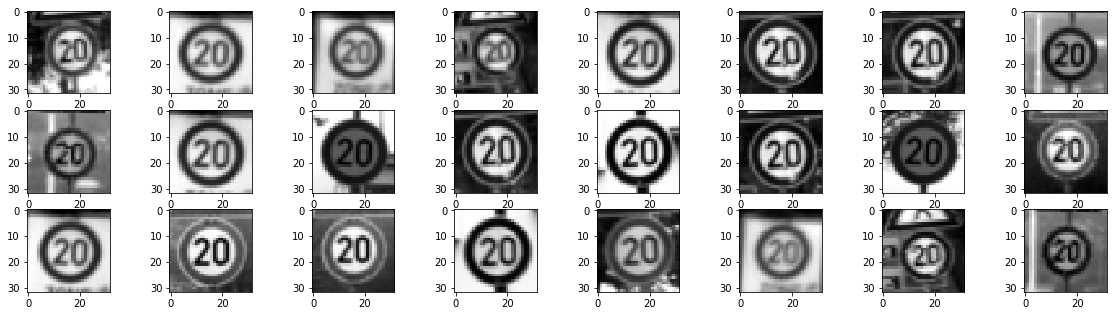

In [40]:
X_train_gray = np.zeros(shape=(n_train,32, 32))
X_valid_gray = np.zeros(shape=(n_validation,32, 32))
X_test_gray = np.zeros(shape=(n_test,32, 32))
for i in range(0,n_train):
   X_train_gray[i] = cv2.cvtColor(X_train[i], cv2.COLOR_BGR2GRAY)
for i in range(0,n_validation):
   X_valid_gray[i] = cv2.cvtColor(X_valid[i], cv2.COLOR_BGR2GRAY)
for i in range(0,n_test):
   X_test_gray[i] = cv2.cvtColor(X_test[i], cv2.COLOR_BGR2GRAY)
                            

categoryimages = []
indices = np.where(y_train == np.argmin(n))[0]
for i in np.random.choice(indices, 24, replace=False):
    categoryimages.append(X_train_gray[i])


plt.figure(figsize=(20, 7))
columns = 8
for i, categoryimage in enumerate(categoryimages):
    plt.subplot(len(categoryimages) / columns + 1, columns, i + 1)
    plt.imshow(categoryimage, cmap='gray')

In [10]:
# DO NOT RUN this cell 
X_train[:,:,:,0] = X_train_gray
X_train[:,:,:,1] = X_train_gray
X_train[:,:,:,2] = X_train_gray

X_valid[:,:,:,0] = X_valid_gray
X_valid[:,:,:,1] = X_valid_gray
X_valid[:,:,:,2] = X_valid_gray

X_test[:,:,:,0]  = X_test_gray
X_test[:,:,:,1]  = X_test_gray
X_test[:,:,:,2]  = X_test_gray



In [41]:

X_train = normalize(X_train)
X_valid = normalize(X_valid)
X_test  = normalize(X_test)


### Model Architecture

In [42]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf

EPOCHS = 50
BATCH_SIZE = 128
dropout =  0.75


In [43]:
from tensorflow.contrib.layers import flatten

def LeNet_Sign_Classifier(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x3 Output =28x28x9
    conv1_W = tf.Variable(tf.truncated_normal(shape=(6, 6, 3, 9), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(9))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
    #print(conv1.get_shape())
    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x9 Output = 14x14x9
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    #print(conv1.get_shape())
    # SOLUTION: Layer 2: Convolutional. Output = 14x14x9.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(6, 6, 9, 24), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(24))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    #print(conv2.get_shape())
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x24. Output = 5x5x24.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    #print(conv2.get_shape())
    # SOLUTION: Flatten. Input = 5x5x24. Output = 600.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 600. Output = 180.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(384, 180), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(180))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)
  #  fc1    = tf.nn.dropout(fc1, dropout)

    # SOLUTION: Layer 4: Fully Connected. Input = 180. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(180, 104), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(104))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2 = tf.nn.relu(fc2)
    #fc2 = tf.nn.dropout(fc2, dropout)

    # SOLUTION: Layer 5: Fully Connected. Input = 104. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(104, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits


In [44]:
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [45]:


rate = 0.001

logits = LeNet_Sign_Classifier(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
probabilities = tf.nn.softmax(logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [46]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy, scores, probs= sess.run((accuracy_operation,logits,probabilities),  feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return [total_accuracy / num_examples, logits, probs]

In [47]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy, scores, probs = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.827

EPOCH 2 ...
Validation Accuracy = 0.886

EPOCH 3 ...
Validation Accuracy = 0.916

EPOCH 4 ...
Validation Accuracy = 0.923

EPOCH 5 ...
Validation Accuracy = 0.930

EPOCH 6 ...
Validation Accuracy = 0.924

EPOCH 7 ...
Validation Accuracy = 0.933

EPOCH 8 ...
Validation Accuracy = 0.934

EPOCH 9 ...
Validation Accuracy = 0.930

EPOCH 10 ...
Validation Accuracy = 0.931

EPOCH 11 ...
Validation Accuracy = 0.930

EPOCH 12 ...
Validation Accuracy = 0.930

EPOCH 13 ...
Validation Accuracy = 0.940

EPOCH 14 ...
Validation Accuracy = 0.949

EPOCH 15 ...
Validation Accuracy = 0.934

EPOCH 16 ...
Validation Accuracy = 0.945

EPOCH 17 ...
Validation Accuracy = 0.950

EPOCH 18 ...
Validation Accuracy = 0.946

EPOCH 19 ...
Validation Accuracy = 0.948

EPOCH 20 ...
Validation Accuracy = 0.951

EPOCH 21 ...
Validation Accuracy = 0.957

EPOCH 22 ...
Validation Accuracy = 0.945

EPOCH 23 ...
Validation Accuracy = 0.961

EPOCH 24 ...
Validation Accura

In [48]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy, scores, probs = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))
    a = sess.run(tf.nn.top_k(probs, 5))
print(probs)
print(a)

Test Accuracy = 0.941
[[  0.00000000e+00   0.00000000e+00   1.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   5.87176588e-14
    0.00000000e+00   0.00000000e+00]
 [  9.66901763e-24   4.63505704e-15   6.13505330e-27 ...,   8.78567455e-13
    3.35866917e-19   2.40197149e-27]
 ..., 
 [  1.93665806e-10   1.23791688e-03   1.30520959e-07 ...,   2.69188968e-05
    1.13485776e-05   5.47793533e-10]
 [  6.68222471e-15   5.13700726e-09   6.43186504e-10 ...,   2.77789503e-14
    2.33670367e-17   2.00380263e-14]
 [  1.02326660e-20   4.46382585e-22   3.53806990e-13 ...,   1.11517690e-14
    3.33688894e-17   8.44033127e-24]]
TopKV2(values=array([[  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00],
       [  1.00000000e+00,   1.12399686e-13,   5.87176588e-14,
          1.99595168e-21,   1.62947078e-21],
       [  3.75203550e-01,   3.41216117e-01,   1.88891023e-01,
        

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

['70.jpg', 'No-entry.jpg', '100kmh.jpg', 'stop1r.jpg', 'slipperyroadr.jpg', 'pedestrian-crossingr.jpg', 'stop3.jpg', 'Double-curver.jpg', 'stop1.jpg', 'stop2.jpg', 'stop1r20.jpg', 'pedestriansr.jpg', 'slipperyroad.jpg', 'yield.jpg', 'pedestriansr20.jpg', 'yeildroundaboutr.jpg', 'downloadr.jpg', 'Double-curve.jpg', 'yieldr.jpg', 'No-entryr20.jpg', 'No-entryr.jpg']


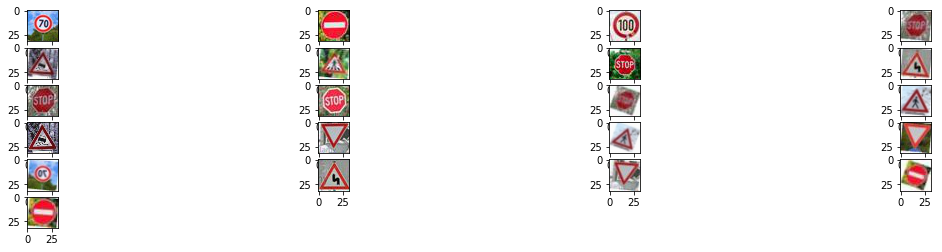

In [49]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import scipy 
from scipy import ndimage
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
dirname = "test_images/"
import os
file_list = os.listdir(dirname)
print(file_list)


testimages = np.zeros(shape = (len(file_list), 32, 32, 3))

for i in range(0, len(file_list)):
    testimages[i] = mpimg.imread(dirname  + file_list[i])
    
testimages[0] = np.flip(testimages[0], axis=0)
testimages[0] = scipy.ndimage.rotate(testimages[0],180)

plt.figure(figsize=(20, 4))
columns = 4
normimages = normalize(testimages)
for i in range(0,len(normimages)):
    plt.subplot(len(normimages) / columns + 1, columns, i + 1)
    plt.imshow(normimages[i])




### Predict the Sign Type for Each Image

In [50]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.



testlabels = [4, 17, 7, 14 ,23, 27, 14 ,21, 14, 14, 14, 27, 23, 13, 27, 13, 4, 21, 13, 17, 17 ]
def evaluateWebSigns(WebSigns_x, WebSign_y):
    num_examples = len(WebSigns_x)
    total_accuracy = 0
    sess = tf.get_default_session()
    accuracy , prediction, scores, xentropy = sess.run((accuracy_operation, correct_prediction, logits, cross_entropy), feed_dict={x: WebSigns_x, y: WebSign_y})
    total_accuracy += (accuracy * len(WebSigns_x))
    
    return [total_accuracy / num_examples, prediction, scores, xentropy]
    
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    test_accuracy , prediction, scores , xentropy= evaluateWebSigns(testimages, testlabels)
    print("Test Accuracy = {:.3f}".format(test_accuracy))    
    print("Prediction Success =", prediction)    
    print("Cross Entropy =", xentropy)    
    softmaxprobabilities = sess.run(tf.nn.top_k(tf.nn.softmax(scores), 5))
    Detected_Signs = sess.run(tf.nn.top_k(tf.nn.softmax(scores), 1))[1]


Test Accuracy = 0.762
Prediction Success = [False  True  True  True  True False  True  True  True  True  True  True
  True  True False  True False False  True  True  True]
Cross Entropy = [  842.95605469     0.             0.             0.             0.
   772.52001953     0.             0.             0.             0.             0.
     0.             0.             0.          3337.96582031     0.
  3464.05517578  1696.91992188     0.             0.             0.        ]


### Analyze Performance

#### Detected labels vs Testlabels

In [51]:
print("True\tDetected")
for i in range(0, len(testlabels)):
    if (Detected_Signs[i, 0] == testlabels[i]):
        print(testlabels[i],"\t", Detected_Signs[i, 0])
    else:
        print(testlabels[i],"--->X", Detected_Signs[i, 0])


True	Detected
4 --->X 0
17 	 17
7 	 7
14 	 14
23 	 23
27 --->X 18
14 	 14
21 	 21
14 	 14
14 	 14
14 	 14
27 	 27
23 	 23
13 	 13
27 --->X 1
13 	 13
4 --->X 17
21 --->X 31
13 	 13
17 	 17
17 	 17


Performance seems to be within the expected range.

Some signs have been rotated 5 degres and other 20 degrees to firther test performance.
One sign (Pedestrian Crossing) was not in the trainign set and it gets mislabeled each time with similar signs, namley
the General Wanring and Wid Animals Warning signs.
The 70 Kmh speed liimit sign that is intentionally mirrored gets correclty mislabeled.  
The 20 degree rotated Double Curve sign gets mislabeled as well. 

Judging by the softmax probabiliets, the model is way larger than necessary such that the 
probabilites of the "distant" signs aren't numerically meaningful.

A better training would likley lead to a better weights distribution 


#### Softmax probabilities 
Logits of First Sign, the only one that failed  followed by 5 best probabilites 

In [52]:
print(scores[0])
print(softmaxprobabilities)

[  6880.58544922   4288.42626953 -12861.44042969 -10185.26367188
   6037.62939453  -7626.01367188 -16976.89453125 -11386.47265625
  -2635.20727539 -13248.68359375 -20399.046875   -17333.12695312
 -19289.84179688 -14086.20214844  -1625.26721191  -6769.42285156
 -21014.40820312   1835.10620117  -1581.84265137 -11170.81445312
  -9275.0859375  -11252.81347656   -936.83355713  -9527.36328125
  -6245.61083984   1150.73852539  -7470.95849609 -15031.49609375
  -7928.83691406   2680.85693359 -11375.11523438   -500.21633911
 -11732.24023438 -22071.98828125 -16098.61425781 -19258.4921875  -12009.3125
 -17556.26367188  -7499.70898438  -9676.81738281 -16429.57226562
 -18095.90625    -29245.98632812]
TopKV2(values=array([[ 1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 1.,  0., 

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.